<ul><li style="font-size: 24px; font-weight: bold">Importing Modules</li></ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<ul><li style="font-size: 24px; font-weight: bold">Data Info</li></ul>

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.shape

(150, 6)

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<ul><li style="font-size: 24px; font-weight: bold">Data Preprocessing</li></ul>

In [13]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
# Removing the ID column as it doesn't required
df2 = df.drop("Id", axis="columns")
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
keys = df2.columns
keys

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Unique Values And There Data Type

In [25]:
for key in keys:
    print("{}: Unique = {}\n Type = {}\n".format(key, df2[key].unique(), type(df2[key].unique()[0])))

SepalLengthCm: Unique = [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
 Type = <class 'numpy.float64'>

SepalWidthCm: Unique = [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
 Type = <class 'numpy.float64'>

PetalLengthCm: Unique = [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
 Type = <class 'numpy.float64'>

PetalWidthCm: Unique = [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
 Type = <class 'numpy.float64'>

Species: Unique = ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
 Type = <class 'str'>



In above we can clearly see that every feature is numpy.float64 type except the Species Feature

## One-Hot-Encoding

In [33]:
df2["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [34]:
df3 = df2.copy()

In [35]:
mapping_dic = {}
for idx, sp in enumerate(df3["Species"].unique()):
    mapping_dic[sp] = idx
mapping_dic

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [37]:
Species = df3["Species"].apply(lambda x: mapping_dic[x])
Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [39]:
df3["Species"] = Species
df3.head()
# {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<ul><li style="font-size: 24px; font-weight: bold">Data Visualization</li></ul>

## Relation between Sepal Length and Petal Length

Text(0.5, 1.0, 'Relation between Sepal Length and Petal Length')

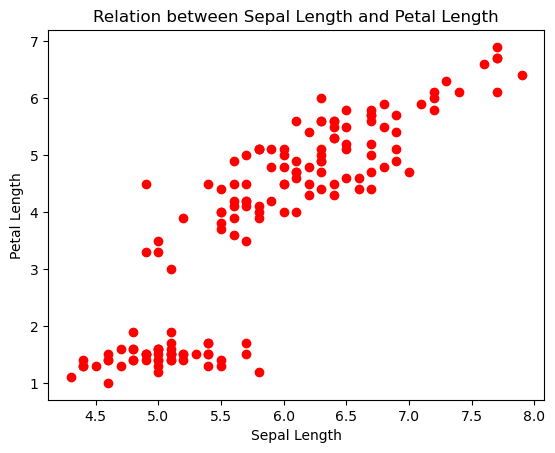

In [49]:
plt.scatter(df3["SepalLengthCm"], df3["PetalLengthCm"], color="red")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Relation between Sepal Length and Petal Length")

## Relation between Sepal Width and Petal Width

Text(0.5, 1.0, 'Relation between Sepal Width and Petal Width')

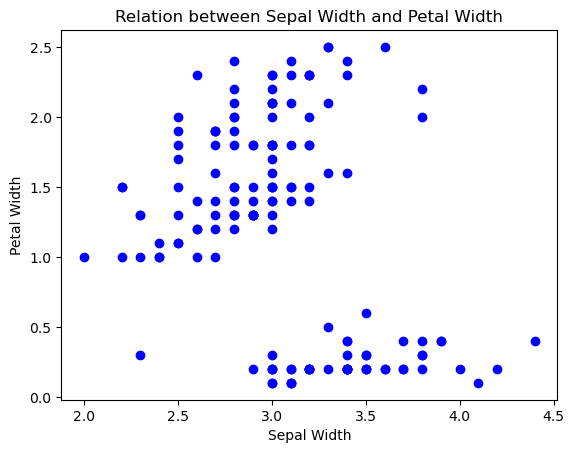

In [48]:
plt.scatter(df3["SepalWidthCm"], df3["PetalWidthCm"], color="blue")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.title("Relation between Sepal Width and Petal Width")

## Relation between Species and other features

In [53]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


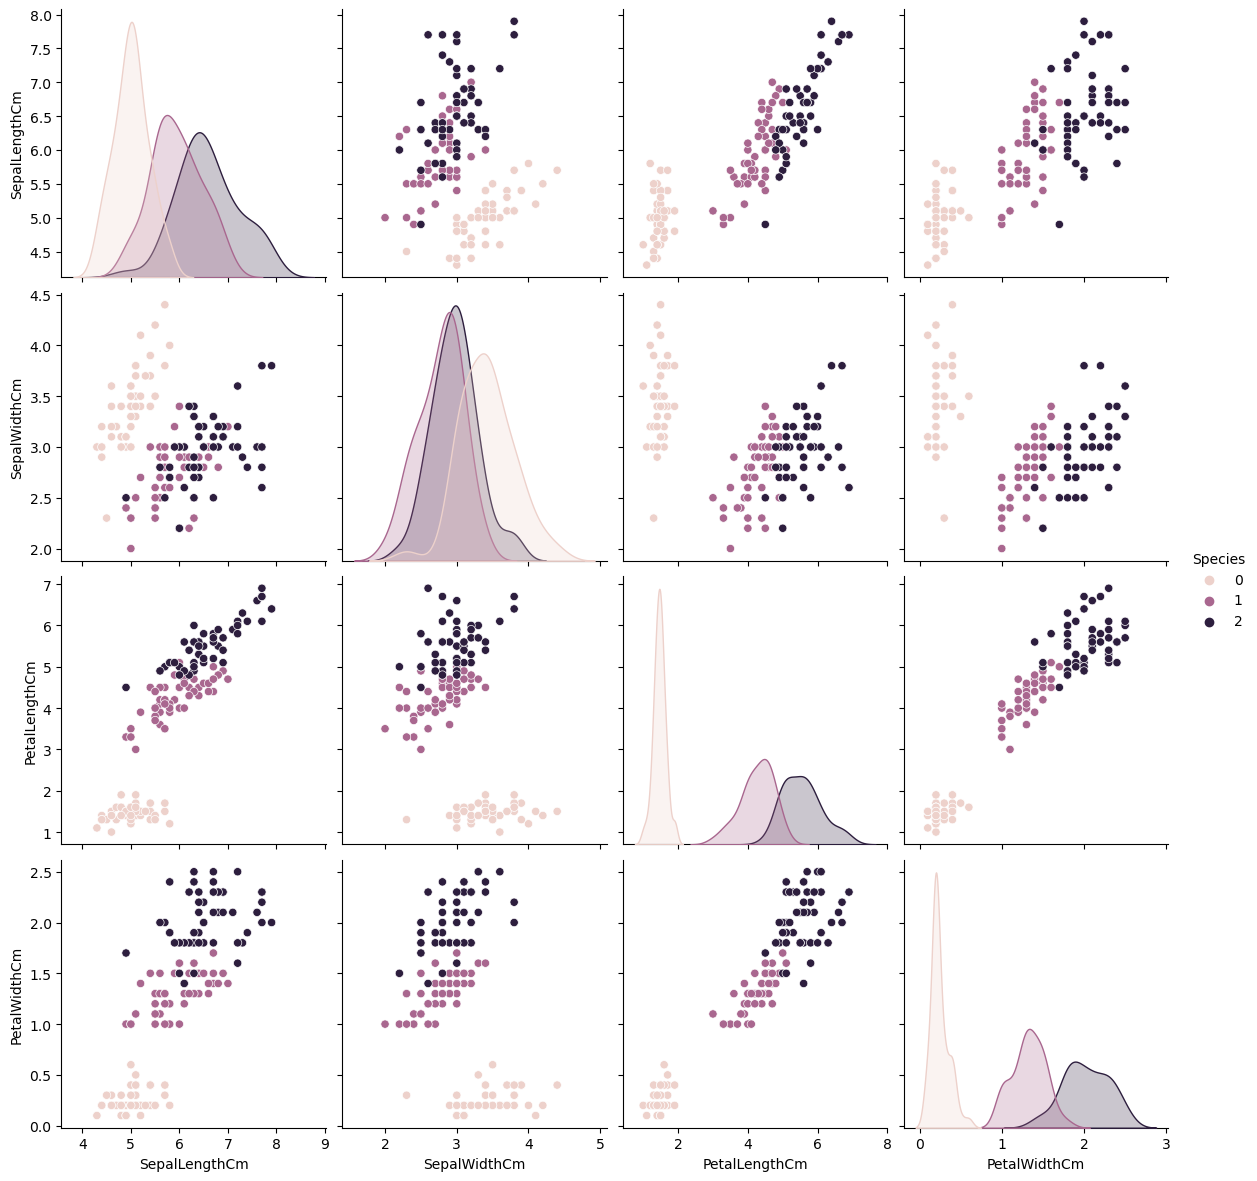

In [57]:
sns.pairplot(df3, hue="Species", size=3)

<ul><li style="font-size: 24px; font-weight: bold">Saving The Processed Data</li></ul>

In [60]:
df3.to_csv("processed_iris.csv", index=False)